### Load Required Packages

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import metrics
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

### Load Dataset

In [9]:
base_path = '/Users/barnana/Downloads/Deepfake_Project/deepfake-image-detection-master/deepfake-image-detection-master/archive/real_vs_fake/real-vs-fake'
image_gen = ImageDataGenerator(rescale=1./255.)

train_flow = image_gen.flow_from_directory(
    base_path + '/train/',
    target_size=(224, 224),
    batch_size=64,
    shuffle=False,
    class_mode='binary'
)

test_flow = image_gen.flow_from_directory(
    base_path + '/test/',
    target_size=(224, 224),
    batch_size=1,
    shuffle = False,
    class_mode='binary'
)


Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


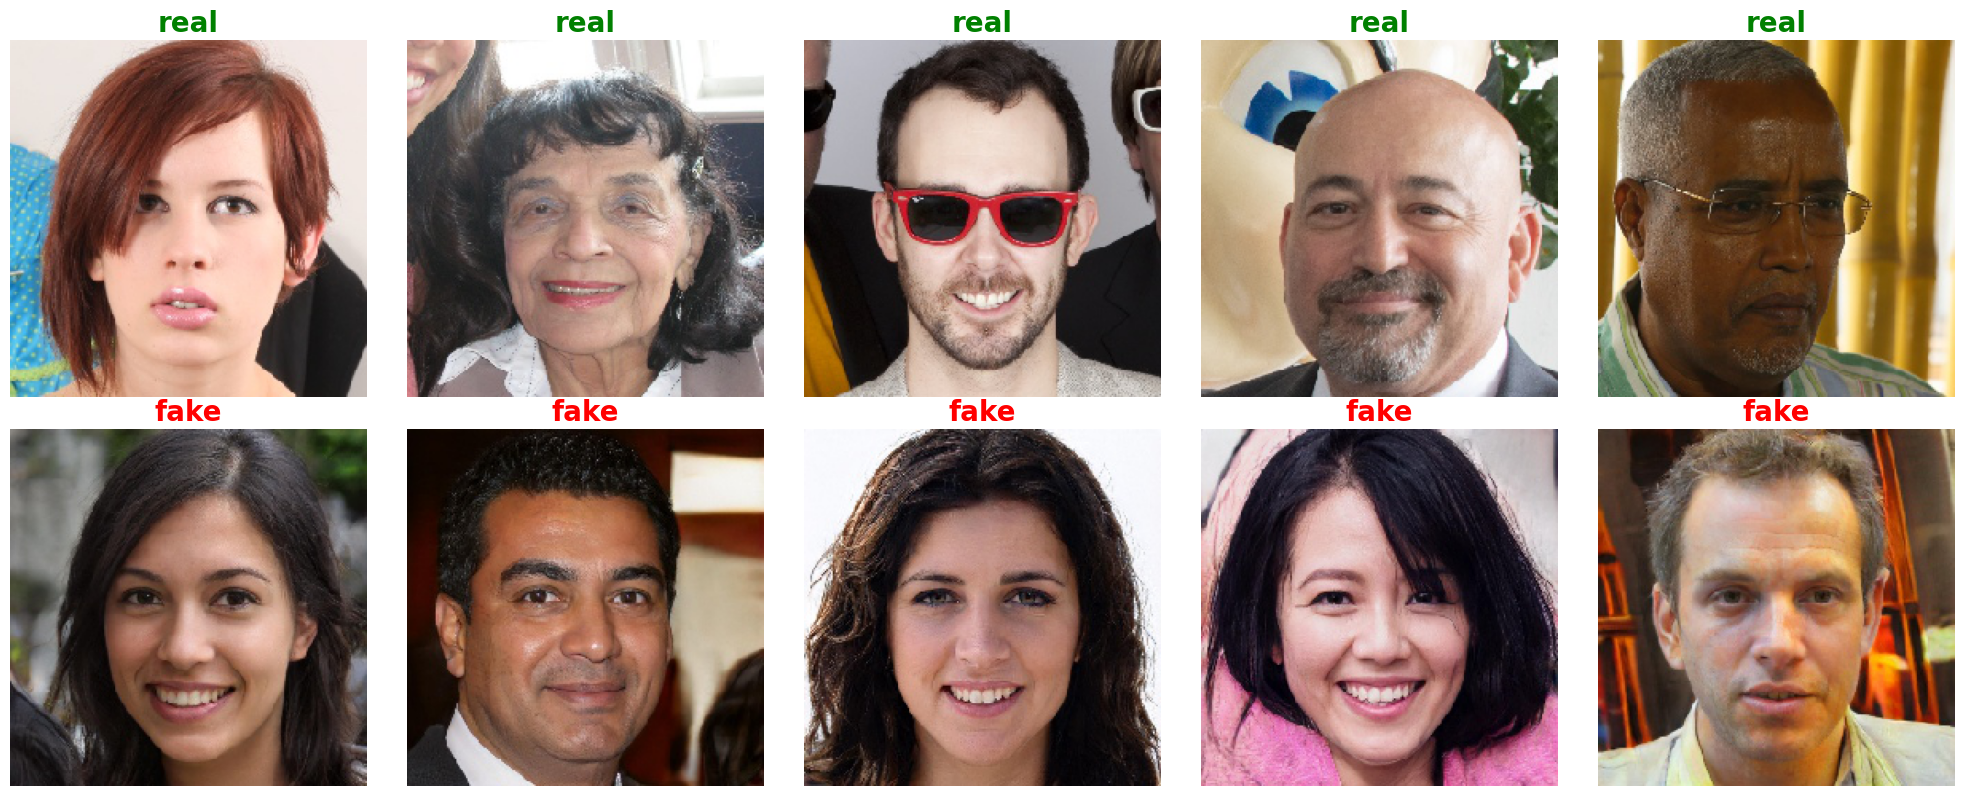

In [46]:
base_path_train = '/Users/barnana/Downloads/Deepfake_Project/deepfake-image-detection-master/deepfake-image-detection-master/archive/real_vs_fake/real-vs-fake/train'

# Setting up categories
categories = ['real', 'fake']

# Function to plot images with labels
def plot_images_with_labels(category, ax, color):
    images = os.listdir(os.path.join(base_path_train, category))[-5:]  # Get first 5 images
    for i, image in enumerate(images):
        img_path = os.path.join(base_path_train, category, image)
        img = load_img(img_path, target_size=(224, 224))
        ax[i].imshow(img)
        ax[i].set_title(category, color=color, fontsize=20, fontweight='bold')
        ax[i].axis('off')

# Setting up the plot
fig, ax = plt.subplots(2, 5, figsize=(20, 8))

# Plot real images in green
plot_images_with_labels('real', ax[0], 'green')

# Plot fake images in red
plot_images_with_labels('fake', ax[1], 'red')

plt.tight_layout()
plt.show()

In [16]:
# Load the models
Custom_CNN_model = load_model('./models/Custom_CNN_model.h5')
DenseNet_model = load_model('./models/DenseNet_model.h5')
DenseNet_Augmented_model = load_model('./models/DenseNet_Augmented_model.h5')
DenseNet_Grayscale_model = load_model('./models/DenseNet_Grayscale_model.h5')
actual_label = 1  # 0 for Real, 1 for Fake
models = {
    "Custom_CNN_model": Custom_CNN_model,
    "DenseNet_model": DenseNet_model,
    "DenseNet_Augmented_model": DenseNet_Augmented_model,
    "DenseNet_Grayscale_model": DenseNet_Grayscale_model
}



In [25]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt

def display_and_predict(image_path, models, target_size=(224, 224), actual_label=1):
    # Load and display the image
    img = load_img(image_path, target_size=target_size)
    plt.imshow(img)
    plt.axis('off')  # Don't show axis
    plt.show()

    # Print the actual label
    actual_label_text = 'Fake' if actual_label == 1 else 'Real'
    print(f"Actual Label: {actual_label_text}")

    # Convert the image to an array and rescale
    img_array = img_to_array(img) / 255.

    # Dictionary to store predictions
    predictions = {}

    # Loop over the models and predict
    for model_name, model in models.items():
        # Check if the model expects grayscale images
        if 'Grayscale' in model_name:
            # Convert the image to grayscale by averaging the RGB channels
            img_array_gray = np.mean(img_array, axis=-1, keepdims=True)
            # Ensure the input is correctly shaped for the model expecting grayscale images
            img_array_gray = np.expand_dims(img_array_gray, axis=0)
            pred = model.predict(img_array_gray)
        else:
            # Prepare the image for RGB models
            img_array_rgb = np.expand_dims(img_array, axis=0)
            pred = model.predict(img_array_rgb)

        # Assuming the model outputs a sigmoid activation
        prediction_text = 'Fake' if pred[0][0] < 0.5 else 'Real'
        predictions[model_name] = prediction_text
        print(f"{model_name}: {prediction_text}")
    
    return predictions




In [31]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

def display_and_predict(image_path, models, target_size=(224, 224), actual_label=1):
    # Load and display the image
    img = load_img(image_path, target_size=target_size)
    plt.imshow(img)
    plt.axis('off')  # Don't show axis
    plt.show()

    # Print the actual label with styling
    actual_label_text = 'Fake' if actual_label == 1 else 'Real'
    display(HTML(f"<b style='color: blue; font-size: 20px;'>Actual Label: {actual_label_text}</b>"))

    # Convert the image to an array and rescale
    img_array = img_to_array(img) / 255.

    # Dictionary to store predictions
    predictions = {}

    # Define colors for output
    colors = {'Fake': 'red', 'Real': 'green'}

    # Loop over the models and predict
    for model_name, model in models.items():
        # Check if the model expects grayscale images
        if 'Grayscale' in model_name:
            # Convert the image to grayscale by averaging the RGB channels
            img_array_gray = np.mean(img_array, axis=-1, keepdims=True)
            # Ensure the input is correctly shaped for the model expecting grayscale images
            img_array_gray = np.expand_dims(img_array_gray, axis=0)
            pred = model.predict(img_array_gray)
        else:
            # Prepare the image for RGB models
            img_array_rgb = np.expand_dims(img_array, axis=0)
            pred = model.predict(img_array_rgb)

        # Assuming the model outputs a sigmoid activation
        prediction_text = 'Fake' if pred[0][0] < 0.5 else 'Real'
        predictions[model_name] = prediction_text
        
        # Display prediction with styling
        display(HTML(f"<b style='color: {colors[prediction_text]}; font-size: 20px;'>{model_name}: {prediction_text}</b>"))
    
    return predictions


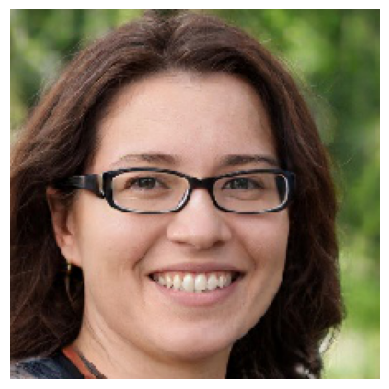

1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 316ms/step


1/1 [==============================] - 0s 249ms/step


1/1 [==============================] - 0s 194ms/step


In [32]:
# Example usage, adjust the actual_label and image_path as needed
image_path = '/Users/barnana/Downloads/Deepfake_Project/deepfake-image-detection-master/deepfake-image-detection-master/archive/real_vs_fake/real-vs-fake/test/fake/0A266M95TD.jpg'

predictions = display_and_predict(image_path, models, actual_label=1)

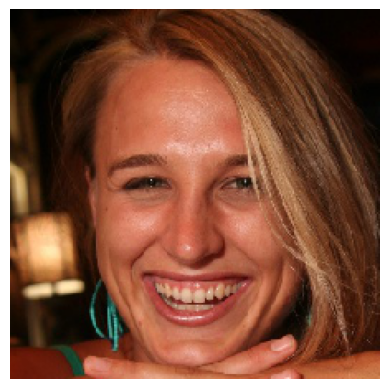

1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 282ms/step


1/1 [==============================] - 0s 257ms/step


1/1 [==============================] - 0s 245ms/step


In [33]:
image_path = '/Users/barnana/Downloads/Deepfake_Project/deepfake-image-detection-master/deepfake-image-detection-master/archive/real_vs_fake/real-vs-fake/test/real/00001.jpg'

predictions = display_and_predict(image_path, models, actual_label=0)
